In [1]:
import sys; sys.path.append('..')

In [2]:
from IPython.display import Image
from os import path

In [3]:
from collections import deque, defaultdict

In [4]:
from graph import Graph
from pxcrossover import compose, connected, Component

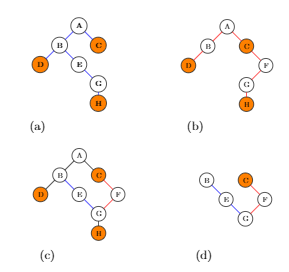

In [5]:
Image(filename=path.join("img","grafo_4.png"))

In [6]:
aa = Graph(edges={
    'A' : {'B' : 1, 'C' : 1},
    'B' : {'A' : 1, 'D' : 1, 'E' : 1},
    'D' : {'B' : 1},
    'C' : {'A' : 1},
    'E' : {'B' : 1, 'G' : 1},
    'G' : {'E' : 1, 'H' : 1},
    'H' : {'G' : 1}
})

bb = Graph(edges={
    'A' : {'B' : 1, 'C' : 1},
    'B' : {'A' : 1, 'D' : 1,},
    'D' : {'B' : 1},
    'C' : {'A' : 1, 'F' : 1},
    'F' : {'C' : 1, 'G' : 1},
    'G' : {'F' : 1, 'H' : 1},
    'H' : {'G' : 1}
})

g_union, g_common, g_star = compose(aa, bb)

first, second, previous = connected(g_union, aa, bb, 'A')

In [7]:
first = first[0]
second = second[0]

In [8]:
first.portal

{'B', 'G'}

In [9]:
second.portal

{'C', 'G'}

In [10]:
diff = first.portal ^ second.portal

In [12]:
for v in diff:
    p = previous.find(v)
    print(v, p)

B B
C B


In [13]:
set(map(lambda x : previous.find(x), diff))

{'B'}

In [14]:
def test_0(right, left):
    
    return len(right.portal) == len(left.portal)

In [15]:
test_0(second, first)

True

In [16]:
# conjunto de portais são iguais
def test_1(right, left):
    return right.portal == left.portal

In [17]:
test_1(first, second)

False

In [20]:
# os vértices diferentes possuem os mesmos pais
def test_2(right, left, parents):
    
    diff_right = right.portal - left.portal
    diff_left  = left.portal - right.portal
    
    portal_right = set(map(lambda x : parents.find(x), diff_right))
    portal_left  = set(map(lambda x : parents.find(x), diff_left))
    
    return portal_right == portal_left

In [21]:
test_2(first, second, previous)

True

In [24]:
# versão simplificada do teste 2
# mas será a mais eficiente?
# Python Complexity for set operation: Symmetric Difference
# s ^ t não importa o tamanho de s ou t
# Averate case O(len(s))
# Worst case   O(len(s) * len(t))

def test_3(right, left, parents):
    
    diff = right.portal ^ left.portal 
    p_portals = set(map(lambda x : previous.find(x), diff))
    
    if len(p_portals) != 1:
        raise Exception()
        
    return True

In [25]:
test_3(second, first, previous)

True

In [26]:
aa = Graph(edges={
    'E' : {'B' : 1},
    'B' : {'E' : 1, 'A' : 1},
    'A' : {'B' : 1, 'F' : 1},
    'F' : {'A' : 1, 'H' : 1},
    'H' : {'F' : 1, 'J' : 1},
    'J' : {'H' : 1}
})

bb = Graph(edges={
    'E' : {'D' : 1},
    'D' : {'E' : 1, 'C' : 1},
    'C' : {'D' : 1, 'A' : 1},
    'A' : {'C' : 1, 'I' : 1},
    'I' : {'J' : 1, 'A' : 1},
    'J' : {'I' : 1}
})

g_union, g_common, g_star = compose(aa, bb)

first, second, previous = connected(g_union, aa, bb, 'E')

In [27]:
for c1, c2 in zip(first, second):
    print(test_2(c1, c2, previous))

True
True
